In [27]:
import sys
import os
sys.path.append('../src')  # so Python can find your local module

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


In [59]:
PROCESSED_PATH = "../data/processed/"

rtm_cleaned = pd.read_csv(os.path.join(PROCESSED_PATH, 'rtm_cleaned_hourly.csv'))
dam_cleaned = pd.read_csv(os.path.join(PROCESSED_PATH, 'dam_cleaned_hourly.csv'))
demand_cleaned = pd.read_csv(os.path.join(PROCESSED_PATH, 'demand_cleaned_hourly.csv'))
print(demand_cleaned[['INTERVALSTARTTIME_GMT','SCE-TAC']])

print(len(rtm_cleaned))
print(len(dam_cleaned))
print(len(demand_cleaned))

           INTERVALSTARTTIME_GMT       SCE-TAC
0      2023-01-01 08:00:00+00:00   8564.558333
1      2023-01-01 09:00:00+00:00   8186.478333
2      2023-01-01 10:00:00+00:00   7907.568333
3      2023-01-01 11:00:00+00:00   7808.943333
4      2023-01-01 12:00:00+00:00   7695.740833
...                          ...           ...
21690  2025-06-23 02:00:00+00:00  11408.989167
21691  2025-06-23 03:00:00+00:00  11356.300833
21692  2025-06-23 04:00:00+00:00  11263.848333
21693  2025-06-23 05:00:00+00:00  10649.545000
21694  2025-06-23 06:00:00+00:00   9947.837500

[21695 rows x 2 columns]
21695
21695
21695


In [29]:
rtm_cleaned.head()

,INTERVALSTARTTIME_GMT,LMP_CONG_PRC,LMP_ENE_PRC,LMP_LOSS_PRC,LMP_PRC,hour,dayofweek,month,is_weekend,is_night
0,2023-01-01 08:00:00+00:00,0.0,114.298923,-2.352403,111.946518,8.0,6.0,1.0,1.0,0.0
1,2023-01-01 09:00:00+00:00,0.0,107.946913,0.000000,107.946913,9.0,6.0,1.0,1.0,0.0
2,2023-01-01 10:00:00+00:00,0.0,102.325343,0.000000,102.325343,10.0,6.0,1.0,1.0,0.0
3,2023-01-01 11:00:00+00:00,0.0,104.272087,0.000000,104.272087,11.0,6.0,1.0,1.0,0.0
4,2023-01-01 12:00:00+00:00,0.0,112.840600,0.000000,112.840600,12.0,6.0,1.0,1.0,0.0


In [30]:
dam_cleaned.head()

,INTERVALSTARTTIME_GMT,LMP_CONG_PRC,LMP_ENE_PRC,LMP_GHG_PRC,LMP_LOSS_PRC,LMP_PRC
0,2023-01-01 08:00:00+00:00,0.0,121.76724,0.0,-3.29989,118.46735
1,2023-01-01 09:00:00+00:00,0.0,116.13963,0.0,-3.01963,113.12000
2,2023-01-01 10:00:00+00:00,0.0,115.43434,0.0,-2.52801,112.90633
3,2023-01-01 11:00:00+00:00,0.0,110.98059,0.0,-2.55255,108.42804
4,2023-01-01 12:00:00+00:00,0.0,109.83079,0.0,-2.46021,107.37058


In [31]:
demand_cleaned.head()

,INTERVALSTARTTIME_GMT,AVA,AVRN,AZPS,BANC,BANCMID,BANCRDNG,BANCRSVL,BANCSMUD,BANCWASN,...,SCL,SDGE-TAC,SRP,TEPC,TIDC,TPWR,VEA-TAC,WALC,WALCAEPCO,WALCDSW
0,2023-01-01 08:00:00+00:00,1185.871667,NaN,2762.453333,1452.916667,221.223333,90.506667,107.703333,991.462500,40.771667,...,1008.340833,2028.898333,2632.740000,1053.349167,237.224167,485.034167,64.547500,NaN,NaN,NaN
1,2023-01-01 09:00:00+00:00,1164.358333,NaN,2719.446667,1397.607500,212.263333,87.640833,103.218333,950.286667,42.617500,...,984.745833,1945.740000,2588.067500,1042.676667,232.620833,472.771667,63.946667,NaN,NaN,NaN
2,2023-01-01 10:00:00+00:00,1147.382500,NaN,2687.799167,1357.398333,207.339167,85.894167,99.563333,924.633333,38.550833,...,972.111667,1870.350833,2552.485000,1028.437500,225.564167,466.020000,64.369167,NaN,NaN,NaN
3,2023-01-01 11:00:00+00:00,1145.910833,NaN,2683.603333,1342.097500,203.254167,85.846667,98.161667,911.231667,41.934167,...,958.016667,1837.237500,2534.845000,1030.612500,220.252500,463.481667,65.558333,NaN,NaN,NaN
4,2023-01-01 12:00:00+00:00,1156.926667,NaN,2728.672500,1360.279167,202.195833,86.387500,98.434167,930.008333,41.669167,...,953.022500,1815.005000,2559.763333,1051.540833,219.604167,467.844167,66.856667,NaN,NaN,NaN


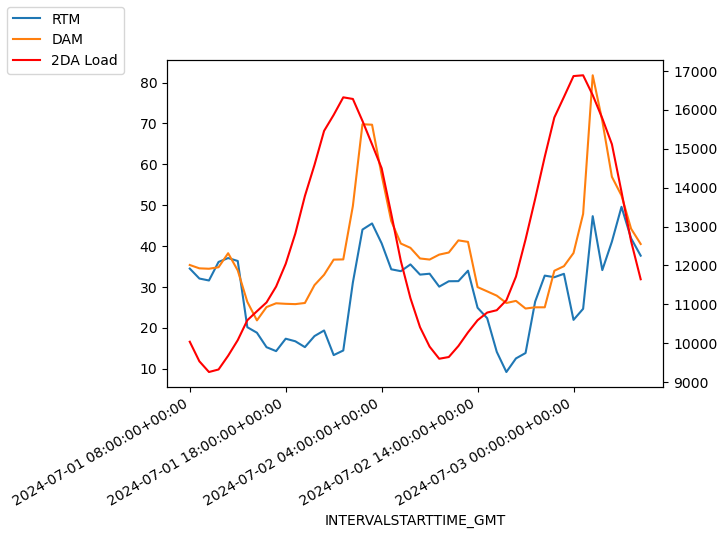

In [53]:
start = '2024-07-01 08:00:00'
end = '2024-07-03 08:00:00'

start_dt = datetime.fromisoformat(start)
end_dt = datetime.fromisoformat(end)

mask = (rtm_cleaned['INTERVALSTARTTIME_GMT'] >= start) & (rtm_cleaned['INTERVALSTARTTIME_GMT'] <= end)

fig, ax = plt.subplots()
ax2 = ax.twinx()
rtm_cleaned[mask].plot(ax=ax, x='INTERVALSTARTTIME_GMT', y='LMP_PRC', label='RTM', legend=False)
dam_cleaned[mask].plot(ax=ax, x='INTERVALSTARTTIME_GMT', y='LMP_PRC', label='DAM', legend=False)
demand_cleaned[mask].plot(ax=ax2, x='INTERVALSTARTTIME_GMT', y='SCE-TAC', color='r', label='2DA Load', legend=False)

fig.legend(loc=2)

plt.gcf().autofmt_xdate()